In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

## 1. IMPORTATION DES DONNEES

In [2]:
fichier_excel = r"A:\Mes_Documents_de_these\DOCUMENTS_RECHERCHE\DOCUMENTS_DE_REPPORTS\Datasets_theses\Rapports2019\01janvier2019\01012019Ma.xlsx" # le chemain du fichier  

donnees = pd.read_excel(fichier_excel,sheet_name=None) # lecture du fichier avec tous les feuilles selon (sheet_name= None)

In [3]:
donnees.keys() # L'ensemble des feuilles contenues dans le classeur du 01/01/2019

dict_keys(['Rapport', 'Centrales', 'Demande', 'Délestage', 'P Inst', 'Energie', 'Pdel', 'Pdispo', 'Clients HT', 'liens', 'Reseau', 'Feuil1'])

In [4]:
"""# selection de l'ensemble des lignes non definies 
df_cleaned = Centrale[~Centrale.apply(lambda x: x.astype(str).str.contains("Unnamed").all(), axis=1)]


df_cleaned = df_cleaned.reset_index(drop=True) # suppression des deux

df_cleaned.columns = df_cleaned.iloc[1]  # Définir la première ligne restante comme en-têtes 

df_cleaned = df_cleaned[1:].reset_index(drop=True)[1:]  # Supprimer cette première ligne après en-tête

df_cleaned"""

'# selection de l\'ensemble des lignes non definies \ndf_cleaned = Centrale[~Centrale.apply(lambda x: x.astype(str).str.contains("Unnamed").all(), axis=1)]\n\n\ndf_cleaned = df_cleaned.reset_index(drop=True) # suppression des deux\n\ndf_cleaned.columns = df_cleaned.iloc[1]  # Définir la première ligne restante comme en-têtes \n\ndf_cleaned = df_cleaned[1:].reset_index(drop=True)[1:]  # Supprimer cette première ligne après en-tête\n\ndf_cleaned'

## 2. Conformite des donnees

In [5]:
""" 
Cette section serve a identifier pour le mois de janvier l'ensemble de classeurs qui ont les memes feuilles
afin de faire un traitement specifique pour chaque groupe  
"""

# Le chemin a suivre pour itterer tout le mois de janvier jour par jour
dossier = r"A:\Mes_Documents_de_these\DOCUMENTS_RECHERCHE\DOCUMENTS_DE_REPPORTS\Datasets_theses\Rapports2019\01janvier2019"  


# liste des fichiers contenus dans le dossier du mois de janvier avec elimination des extentions non conformes
fichiers_excel1 = [f for f in os.listdir(dossier) if f.endswith(".xlsx") and not f.startswith("~$")]

 
# innitialisation pour conpter le nombres de fichiers qui ont les meme feuilles et ceux qui sont differents
vraie, faux = 0, 0

# inintiasation de listes qui contiennent les chemins des differents fichiers
listvraie,lisfaux = [],[] 


for classeur in fichiers_excel1:
    
    
    chemin_complet = os.path.join(dossier, classeur) # pour avoir le chemin complet
    
    
    if pd.read_excel(chemin_complet,sheet_name=None).keys() == donnees.keys(): # comparaison des cles
        
       print(f"Ok pour ce classeur {classeur}") # affichage du dossier
       
       vraie +=1 # iteration
       
       listvraie.append(classeur) # ajouter dans la liste
    else:
        print(f'Ce classseur {classeur} a des feuilles differentes ') # affichages du dossier
        
        lisfaux.append(classeur) # ajout dans le liste
        
        faux +=1 #itteration

print(f'le nombres de fichiers ok {vraie}')

print(f'le nombres de fichiers defecteux {faux}')

Ok pour ce classeur 01012019Ma.xlsx
Ok pour ce classeur 02012019Me.xlsx
Ok pour ce classeur 03012019J.xlsx
Ce classseur 04012019V.xlsx a des feuilles differentes 
Ce classseur 05012019S.xlsx a des feuilles differentes 
Ce classseur 06012019D.xlsx a des feuilles differentes 
Ce classseur 07012019L.xlsx a des feuilles differentes 
Ce classseur 08012019Ma.xlsx a des feuilles differentes 
Ce classseur 09012019Me.xlsx a des feuilles differentes 
Ce classseur 10012019J.xlsx a des feuilles differentes 
Ce classseur 11012019V.xlsx a des feuilles differentes 
Ce classseur 12012019S.xlsx a des feuilles differentes 
Ce classseur 13012019D.xlsx a des feuilles differentes 
Ce classseur 14012019L.xlsx a des feuilles differentes 
Ce classseur 15012019Ma.xlsx a des feuilles differentes 
Ce classseur 16012019Me.xlsx a des feuilles differentes 
Ce classseur 17012019J.xlsx a des feuilles differentes 
Ce classseur 18012019V.xlsx a des feuilles differentes 
Ce classseur 19012019S.xlsx a des feuilles differ

**Dans cette section** 

Nous allons creer deux groupe selon le contenu des classeuers et chaque groupe sera une liste qui contient l'ensemble des classeurs qui ont les meme feuilles

In [6]:

fichiers_excel1 = [f for f in os.listdir(dossier) if f.endswith(".xlsx") and not f.startswith("~$")]


classeur_NO1,classeur_N02 =[],[] # initiasation de liste


for classeur in fichiers_excel1:
    
    if classeur in listvraie:
        
        chemin_complet = os.path.join(dossier, classeur) # chemin compet
        
        
        # recuperation des classeurs de meme feuilles
        classeur_NO1.append(pd.read_excel(chemin_complet,sheet_name=None)) 
        
    else:
        chemin_complet = os.path.join(dossier, classeur) # chemin complet
        
        
        # recuperation des classeurs de meme feuilles
        classeur_N02.append(pd.read_excel(chemin_complet,sheet_name=None))

In [7]:
print(f'Nombre de classeurs avec meme feuille : NO1 =  {len(classeur_NO1)}')

print(f'Nombre de classeurs avec meme feuille : N02 = {len(classeur_N02)}')

Nombre de classeurs avec meme feuille : NO1 =  11
Nombre de classeurs avec meme feuille : N02 = 20


In [8]:
# IL faux verifier si les classeurs different du classeur de teste sont identique entre eux selon les 
# feuille qu'ils contiennent

for i in range(len(classeur_N02[0].keys())):
    
    if classeur_N02[i].keys() == classeur_N02[0].keys(): # comparaison des feuilles 
        
        print("ok")
        
    else:
        
        print("differente")

ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok


### Verification de la conformite du contenue des feuilles pour chaque classeur

In [9]:
print(classeur_NO1[0].keys()) # Affichage des noms des feuilles dans ce claasseur d'indice 0 groupe 1

dict_keys(['Rapport', 'Centrales', 'Demande', 'Délestage', 'P Inst', 'Energie', 'Pdel', 'Pdispo', 'Clients HT', 'liens', 'Reseau', 'Feuil1'])


In [10]:
print(classeur_N02[0].keys()) # Affichage des noms des feuilles de ce classeur d'indece 0 groupee2

dict_keys(['Rapport', 'Centrales', 'Demande', 'Délestage', 'P Inst', 'Energie', 'Pdel', 'Pdispo', 'Clients HT', 'liens', 'Feuil2', 'Reseau', 'Feuil1'])


## 3. Chargement des donnees pour chaque classeur pour l'annee 2019

### 3.1. Donnees mensuelles pour les centrales

In [11]:
liste_centrales = []
for fichier in fichiers_excel1:
    
    chemin_complet = os.path.join(dossier, fichier) # pour avoir le chemin complet
    
    classeur = pd.read_excel(chemin_complet,sheet_name=None) # Importation du classeur avec toutes les feuilles
    
    for feuilles in classeur.keys(): # iteration sur les feuilles du classeur
        
        if feuilles == 'Centrales': # comparaison avec la feuille du nom Centrale
    
            Centrale = classeur['Centrales'] # recuperation du dataframe Centrale

            Centrale.columns = Centrale.iloc[1] # Définir la première ligne restante comme en-têtes 

            Centrale = Centrale[2:].reset_index(drop=True)[:27] # Supprimer les deux premieres ligne apres l'en tetes
            
            liste_centrales.append(Centrale)
            
    Centrales_2019 = pd.concat(liste_centrales,axis=0) # concatenation de l'ensemble des dataframe pour l'année 2024

In [12]:
Centrales_2019.shape

(837, 28)

In [13]:
Centrales_2019.head()

1,Heure,C6,C7,kah 1,Manantali,GTI,Somelec,Kounoune,Agg edm,APR,...,PV Bokhol,PV Sakal,PV Mbour,PV Merina Mekhé,PV Santhiou Mekhé,PV Kahone,Total PV,PV DIASS,NaN,NaN
0,1 h,82.3,78.2,0,9.365707,0,0,29.8,0,106.9,...,0,0,0,0,0,0,0,0,NaN,12.7
1,2 h,83.2,78.2,0,19.677563,0,0,29.8,0,75.2,...,0,0,0,0,0,0,0,0,NaN,NaN
2,3 h,82.2,77.8,0,17.521857,0,0,29.8,0,73.9,...,0,0,0,0,0,0,0,0,NaN,NaN
3,4 h,68.4,62.3,0,0,0,0,29.8,0,77.2,...,0,0,0,0,0,0,0,0,NaN,NaN
4,5 h,68.3,52.2,0,24.902888,0,0,29.8,0,75.1,...,0,0,0,0,0,0,0,0,NaN,NaN


<Axes: >

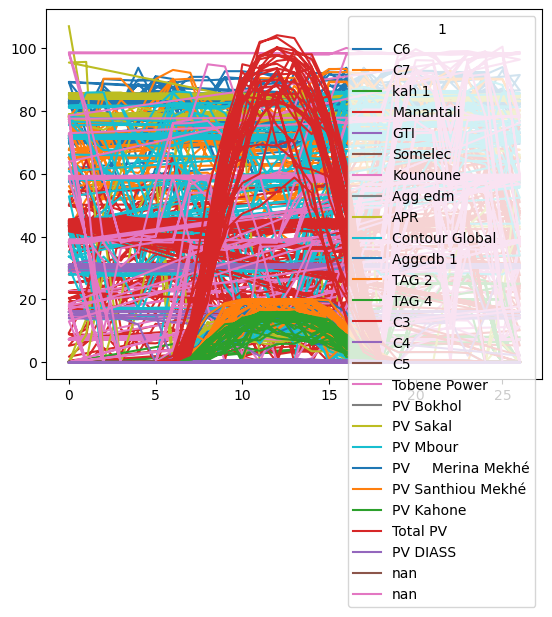

In [14]:
Centrales_2019.plot()

### 3.2. Donnees mensuelles pour les Demandes en 2019

In [15]:
liste_demande = []
for fichier in fichiers_excel1:
    
    chemin_complet = os.path.join(dossier, fichier) # pour avoir le chemin complet
    
    classeur = pd.read_excel(chemin_complet,sheet_name=None)
    
    for feuilles in classeur.keys():
        
        if feuilles == 'Demande':
    
            Demande = classeur['Demande']

            Demande.columns  = classeur['Demande'].iloc[1]

            Demande = Demande[2:].reset_index(drop=True)[:27]

            Demande = Demande.loc[:,list(Demande.columns[:5])]
            liste_demande.append(Demande)
    Demande_2019 = pd.concat(liste_demande,axis=0) 

In [16]:
Demande_2019.head(100)

1,Heure,Puis. Dispo,Puis TAG couplée,Demande,Fréq
0,1 h,636.930263,0,430.407707,50.109
1,2 h,636.930263,0,406.129563,49.939
2,3 h,636.930263,0,372.603857,50.281
3,4 h,636.930263,0,356.614,50.365
4,5 h,636.930263,0,352.424888,50.199
...,...,...,...,...,...
14,15 h,555.25612,0,419.2842,NaN
15,16 h,552.90656,0,428.812797,NaN
16,17 h,547.311269,0,430.040519,NaN
17,18 h,537.182,0,447.321663,NaN


<Axes: >

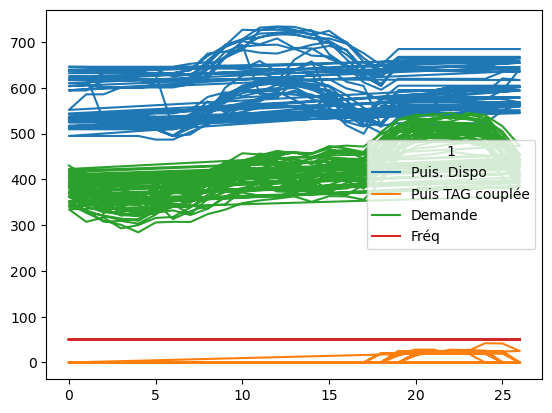

In [17]:
Demande_2019.drop("Heure",axis=1).plot()

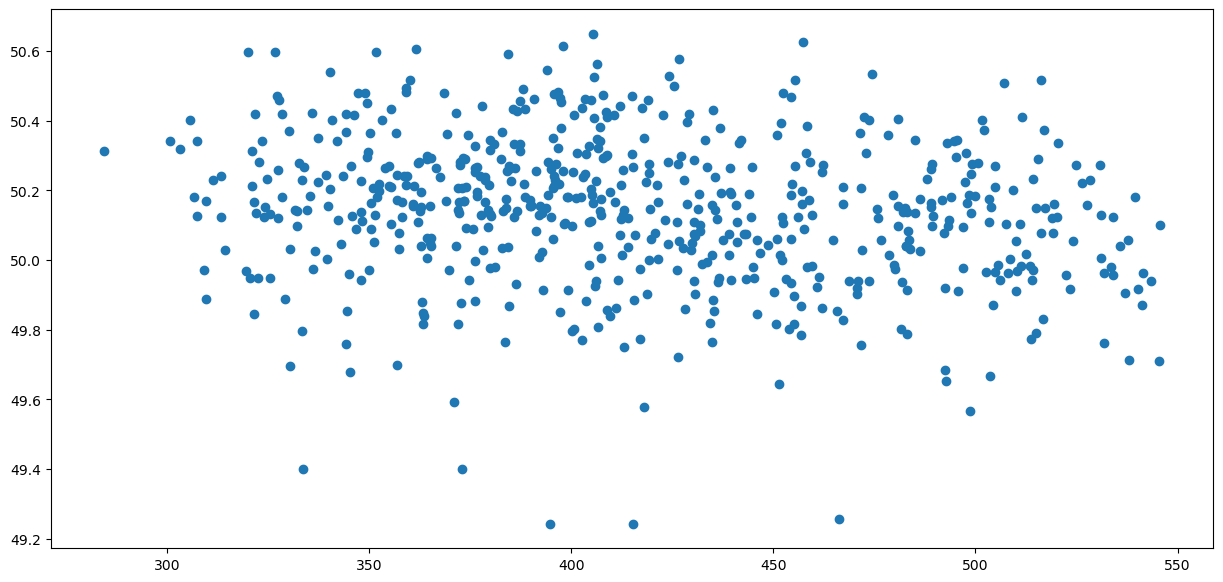

In [18]:
fig = plt.figure(figsize=(15,7))
plt.scatter(Demande_2019.Demande,Demande_2019.Fréq)

<Axes: >

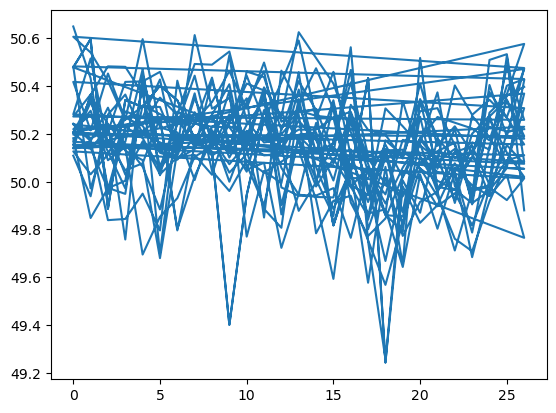

In [19]:
Demande_2019.Fréq.plot()

### 3.2. Donnees mensuelles pour les Delestage en 2019

In [20]:
liste_Délestage = []
for fichier in fichiers_excel1:
    
    chemin_complet = os.path.join(dossier, fichier) # pour avoir le chemin complet
    
    classeur = pd.read_excel(chemin_complet,sheet_name=None)
    
    for feuilles in classeur.keys():
        
        if feuilles == 'Délestage':
    
           Délestage = classeur['Délestage']

           Délestage.columns  = classeur['Délestage'].iloc[1]
           
           Délestage =  Délestage[2:].reset_index(drop=True)[:27]
           
           Délestage = Délestage[Délestage.columns[:7]]
           
           liste_Délestage.append( Délestage) 
            
    Délestage_2019 = pd.concat(liste_Délestage,axis=0) 

In [21]:
Délestage_2019.head()

1,Heure,P.dispo (MW),Demande (MW),Délest par Manque Product,P. Effacée (MW),Autres P. coupée (MW),Déficit total (MW)
0,1 h,636.930263,430.407707,0,0,0,0
1,2 h,636.930263,406.129563,0,0,0,0
2,3 h,636.930263,372.603857,0,0,0,0
3,4 h,636.930263,356.614,0,0,3.3,3.3
4,5 h,636.930263,352.424888,0,0,0,0


In [22]:
Délestage_2019

1,Heure,P.dispo (MW),Demande (MW),Délest par Manque Product,P. Effacée (MW),Autres P. coupée (MW),Déficit total (MW)
0,1 h,636.930263,430.407707,0,0,0,0
1,2 h,636.930263,406.129563,0,0,0,0
2,3 h,636.930263,372.603857,0,0,0,0
3,4 h,636.930263,356.614,0,0,3.3,3.3
4,5 h,636.930263,352.424888,0,0,0,0
...,...,...,...,...,...,...,...
22,21 h,684.65,502.607241,0,0,8.9,8.9
23,21 h 30,684.65,509.316538,0,0,0.05,0.05
24,22 h,684.65,499.258087,0,0,0.1,0.1
25,23 h,684.65,454.315878,0,0,0.05,0.05


#### Analyse graphique sur le delestage en 2019

<Axes: >

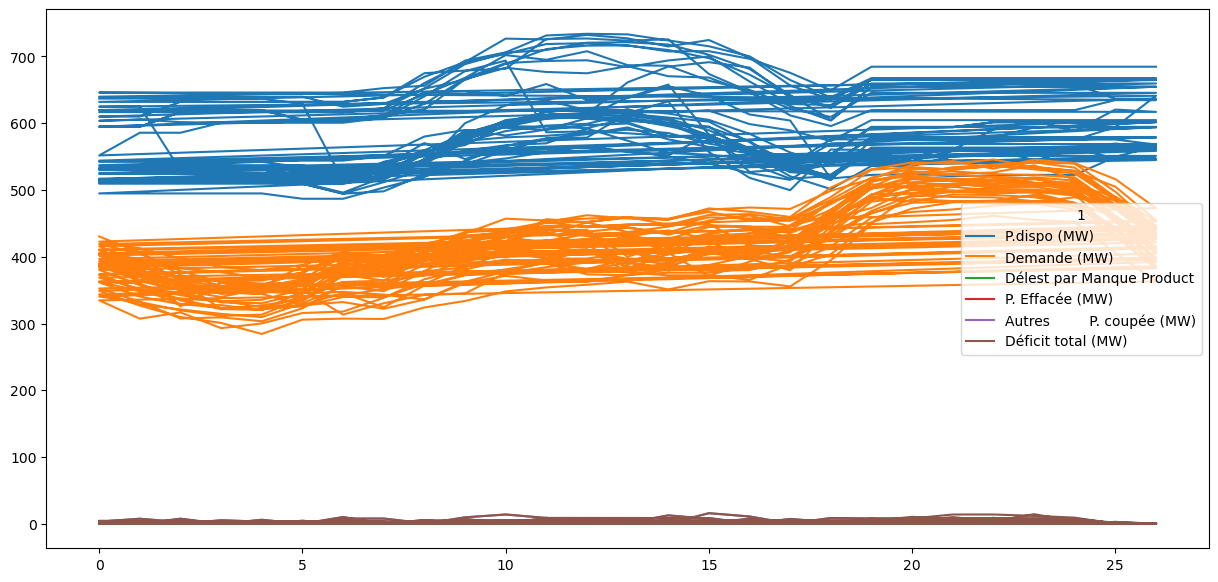

In [23]:
Délestage_2019.plot(figsize=(15,7))

In [24]:
P_Inst = donnees['P Inst']

### 3.3. Donnees mensuelles pour les energie en 2019

In [25]:
donnees['Energie'].head()

,Heures,106,301,303,TAG2,TAG4,401,402,403,404,...,Unnamed: 28,PV Sakal,RI,Manantali+Felou+Somelec,RGI,RGI.1,RGI.2,RGI.3,RGI.4,Export Senelec
0,1,NaN,21,22.0,0.0,0.0,NaN,15.1,NaN,0.0,...,NaN,0.0,421.754,9.365707,431.119707,108.607944,NaN,NaN,NaN,0.0
1,2,NaN,21.1,23.0,0.0,0.0,NaN,15.0,NaN,0.0,...,NaN,0.0,403.672,19.677563,423.349563,106.650484,NaN,NaN,NaN,0.0
2,3,NaN,21,23.0,0.0,0.0,NaN,15.0,NaN,0.0,...,NaN,0.0,382.912,17.521857,400.433857,100.877545,NaN,NaN,NaN,0.0
3,4,NaN,21,22.0,0.0,0.0,NaN,15.1,NaN,0.0,...,NaN,0.0,333.992,0.000000,333.992000,84.139472,9.365707,NaN,NaN,0.0
4,5,NaN,20.7,22.0,0.0,0.0,NaN,15.1,NaN,0.0,...,NaN,0.0,328.956,24.902888,353.858888,89.144350,19.677563,NaN,NaN,0.0


### 3.4. Donnees mensuelles pour les Pdel en 2019

In [26]:
donnees['Pdel'].head()

,T,Départ,Heuredébut,Heurefin,Puissance (kW),00:00:00,1:00:00,2:00:00,3:00:00,4:00:00,...,20:30:00,21:00:00,21:30:00,22:00:00,23:00:00,"1 day, 0:00:00",DUREE,END,Unnamed: 35,Unnamed: 36
0,NaN,NaN,NaN,NaN,NaN,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.00,0.0,NaN,13793.5,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.00,0.0,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,0.0,0,0.0,0.0,3.3,...,0.0,0.0,0.0,0.02,0.02,0.0,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.00,0.0,NaN,NaN,NaN,NaN
4,Manq Prod,NaN,NaN,NaN,NaN,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.00,0.0,00:00:00,0.0,NaN,NaN


### 3.5. Donnees mensuelles pour les Pdispo en 2019

In [27]:
liste_Pdispo = []
for fichier in fichiers_excel1:
    
    chemin_complet = os.path.join(dossier, fichier) # pour avoir le chemin complet
    
    classeur = pd.read_excel(chemin_complet,sheet_name=None)
    
    for feuilles in classeur.keys():
        
        if feuilles == 'Pdispo':
    
           Pdispo = donnees['Pdispo']
           
           Pdispo.columns = Pdispo.iloc[1]
           
           Pdispo  = Pdispo[2:].reset_index(drop=True)[:27]
           
           liste_Pdispo.append( Pdispo) 
            
    Pdispo_2019 = pd.concat(liste_Pdispo,axis=0) 

In [28]:
Pdispo_2019.shape

(837, 47)

In [29]:
Pdispo_2019.head()

1,NaN,106.0,301,302.0,303.0,TG2,TG3,TG4,105,106.0,...,PV mekhé,PV Bokhol,PV Mbour,PV Kahone,PV Sakal,NaN,NaN,quota,NaN,NaN
0,01H00,0.0,22,0.0,22.0,18,NaN,25,NaN,NaN,...,0,0,0,0,0,0.0,4.75,22.280263,636.930263,0.0
1,02H00,0.0,22,0.0,22.0,18,NaN,25,NaN,NaN,...,0,0,0,0,0,0.0,4.75,22.280263,636.930263,0.0
2,03H00,0.0,22,0.0,22.0,18,NaN,25,NaN,NaN,...,0,0,0,0,0,0.0,4.75,22.280263,636.930263,0.0
3,04H00,0.0,22,0.0,22.0,18,NaN,25,NaN,NaN,...,0,0,0,0,0,0.0,4.75,22.280263,636.930263,0.0
4,05H00,0.0,22,0.0,22.0,18,NaN,25,NaN,NaN,...,0,0,0,0,0,0.0,4.75,22.280263,636.930263,0.0


# Autres techniques

In [30]:
import os
import pandas as pd

liste_demande = []

for fichier in fichiers_excel1:
    chemin_complet = os.path.join(dossier, fichier)

    try:
        classeur = pd.read_excel(chemin_complet, sheet_name=None)
    except Exception as e:
        print(f"Erreur lors de l'ouverture de {chemin_complet} : {e}")
        continue

    if "Demande" in classeur:
        Demande = classeur["Demande"]

        try:
            Demande.columns = Demande.iloc[1]  # Redéfinir les colonnes
            Demande = Demande[2:].reset_index(drop=True)  # Commencer à la 3e ligne

            # Nettoyage et gestion de la colonne Heure
            if 'Heure' in Demande.columns:
                print(f"Valeurs brutes dans 'Heure' pour {fichier}:")
                print(Demande['Heure'].unique())  # Afficher les valeurs uniques pour inspection

                # Extraire les chiffres uniquement
                Demande['Heure'] = Demande['Heure'].str.extract(r'(\d+)')  # Extraire les nombres

                # Vérification des valeurs problématiques
                if Demande['Heure'].isnull().any():
                    print(f"Valeurs non valides détectées dans {fichier}. Lignes problématiques :")
                    print(Demande[Demande['Heure'].isnull()])  # Afficher les lignes problématiques
                    Demande = Demande.dropna(subset=['Heure'])  # Supprimer les lignes invalides

                # Convertir en numérique
                Demande['Heure'] = Demande['Heure'].astype(float)

                # Convertir les heures en datetime (par exemple, à partir de "2025-01-01")
                base_date = pd.Timestamp("2019-01-01")
                heures_repetées = Demande['Heure'].astype(int).tolist()

                # Création d'une liste incrémentée d'heures
                heures_incrementées = [
                    base_date + pd.Timedelta(hours=h-1 + i*24)
                    for i in range(len(heures_repetées) // 24 + 1)
                    for h in range(1, 25)
                ][:len(heures_repetées)]  # Limiter à la taille originale

                Demande['DateHeure'] = heures_incrementées

            # Mettre la colonne 'DateHeure' en index
            Demande.set_index('DateHeure', inplace=True)

            # Garder uniquement les 27 premières lignes et 5 colonnes
            Demande = Demande.iloc[:27, :5]
            liste_demande.append(Demande)
        except Exception as e:
            print(f"Erreur lors du traitement de la feuille 'Demande' dans {fichier} : {e}")

if liste_demande:
    Demande_2019 = pd.concat(liste_demande, axis=0)

    # Sauvegarder avec l'index
    Demande_2019.to_excel("Demande_2019.xlsx", index=True)
    print("Fichier 'Demande_2019.xlsx' généré avec succès.")
else:
    print("Aucune donnée extraite.")

Valeurs brutes dans 'Heure' pour 01012019Ma.xlsx:
['1 h' '2 h' '3 h' '4 h' '5 h' '6 h' '7 h' '8 h' '9 h' '10 h' '11 h'
 '12 h' '13 h' '14 h' '15 h' '16 h' '17 h' '18 h' '19 h' '19 h 30' '20 h'
 '20 h 30' '21 h' '21 h 30' '22 h' '23 h' '24 h' 'Max' 'Moy.' 'Min' nan]
Valeurs non valides détectées dans 01012019Ma.xlsx. Lignes problématiques :
1  Heure Puis. Dispo Puis TAG couplée     Demande       Fréq  NaN  NaN  NaN  \
27   NaN  657.903903                0  507.194066     50.534  NaN  NaN  NaN   
28   NaN  585.515072                0   410.56439  50.127481  NaN  NaN  NaN   
29   NaN  513.940263                0  313.325259     49.593  NaN  NaN  NaN   
30   NaN         NaN              NaN         NaN        NaN  NaN  NaN  NaN   
31   NaN         NaN              NaN         NaN        NaN  NaN  NaN        
32   NaN         NaN              NaN         NaN        NaN       NaN  NaN   
33   NaN         NaN              NaN         NaN        NaN       NaN  NaN   
34   NaN         NaN      

In [31]:
Demande_autr_forme = pd.read_excel("Demande_2019.xlsx")
Demande_autr_forme.head()

,DateHeure,Heure,Puis. Dispo,Puis TAG couplée,Demande,Fréq
0,2019-01-01 00:00:00,1,636.930263,0.0,430.407707,50.109
1,2019-01-01 01:00:00,2,636.930263,0.0,406.129563,49.939
2,2019-01-01 02:00:00,3,636.930263,0.0,372.603857,50.281
3,2019-01-01 03:00:00,4,636.930263,0.0,356.614000,50.365
4,2019-01-01 04:00:00,5,636.930263,0.0,352.424888,50.199


In [32]:
Demande_autr_forme.isna().sum()

DateHeure             0
Heure                 0
Puis. Dispo           0
Puis TAG couplée      0
Demande               0
Fréq                224
dtype: int64

In [33]:
Demande_autr_forme.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 837 entries, 0 to 836
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   DateHeure         837 non-null    datetime64[ns]
 1   Heure             837 non-null    int64         
 2   Puis. Dispo       837 non-null    float64       
 3   Puis TAG couplée  837 non-null    float64       
 4   Demande           837 non-null    float64       
 5   Fréq              613 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 39.4 KB


In [34]:
Demande_autr_forme.describe()

,DateHeure,Heure,Puis. Dispo,Puis TAG couplée,Demande,Fréq
count,837,837.000000,837.000000,837.000000,837.000000,613.000000
mean,2019-01-01 12:59:59.999999744,13.333333,591.595115,2.226404,420.599160,50.142515
min,2019-01-01 00:00:00,1.000000,486.850000,0.000000,284.344743,49.243000
25%,2019-01-01 06:00:00,7.000000,544.850000,0.000000,375.751790,50.015000
50%,2019-01-01 13:00:00,14.000000,585.750000,0.000000,412.925887,50.154000
75%,2019-01-01 20:00:00,20.000000,631.950000,0.000000,467.139058,50.276000
max,2019-01-02 02:00:00,24.000000,733.988833,42.000000,545.752726,50.650000
std,NaN,6.948374,56.563381,6.887106,59.904779,0.210841


In [35]:
frequence_couple = Demande_autr_forme['Fréq']
frequence_couple.isna().sum()

224

In [36]:
Demande_autr_forme = Demande_autr_forme.dropna()
Demande_autr_forme.isna().sum()

DateHeure           0
Heure               0
Puis. Dispo         0
Puis TAG couplée    0
Demande             0
Fréq                0
dtype: int64

In [37]:
Demande_autr_forme['ecare']=Demande_autr_forme['Puis. Dispo']-Demande_autr_forme['Demande']
Demande_autr_forme.head()

,DateHeure,Heure,Puis. Dispo,Puis TAG couplée,Demande,Fréq,ecare
0,2019-01-01 00:00:00,1,636.930263,0.0,430.407707,50.109,206.522556
1,2019-01-01 01:00:00,2,636.930263,0.0,406.129563,49.939,230.800700
2,2019-01-01 02:00:00,3,636.930263,0.0,372.603857,50.281,264.326406
3,2019-01-01 03:00:00,4,636.930263,0.0,356.614000,50.365,280.316263
4,2019-01-01 04:00:00,5,636.930263,0.0,352.424888,50.199,284.505375


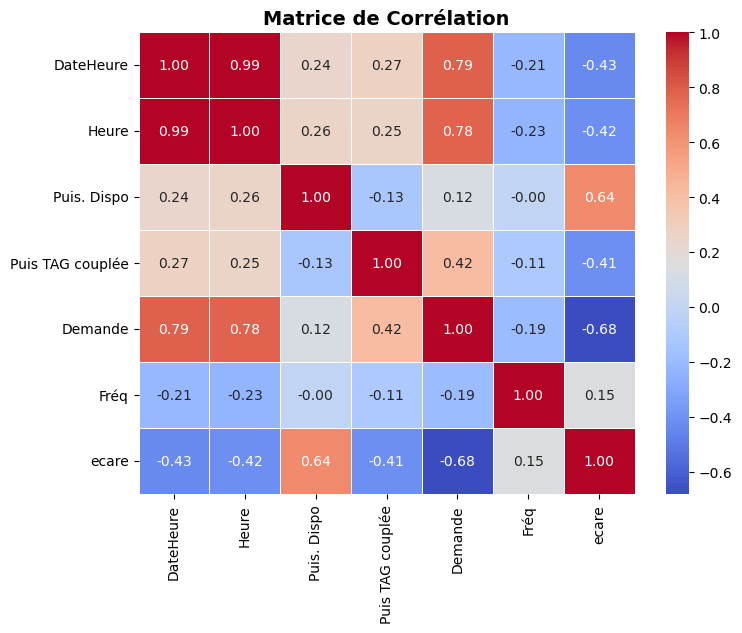

In [38]:
# Calcul de la matrice de corrélation
corr_matrix = Demande_autr_forme.corr()

# Création du heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Ajout d'un titre
plt.title("Matrice de Corrélation", fontsize=14, fontweight="bold")

# Affichage
plt.show()


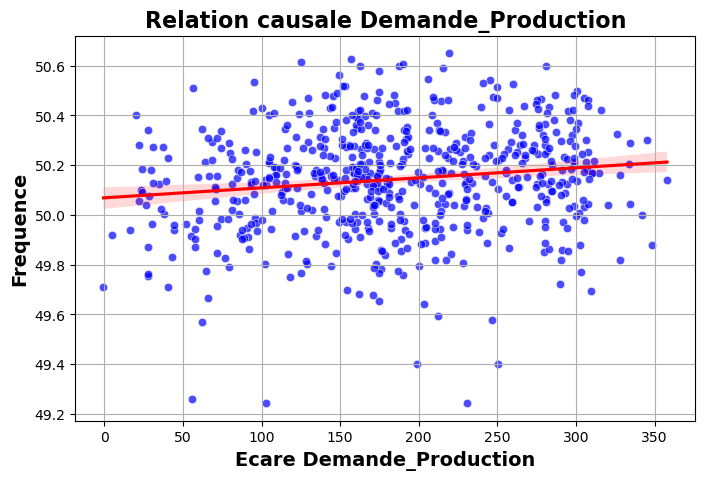

In [39]:
# Génération de données simulant une relation causale

X =Demande_autr_forme.ecare #loc['ecare']# Variable indépendante (cause)
Y = Demande_autr_forme.Fréq #loc['Fréq']  # Variable dépendante (effet)

# Création d'un DataFrame Pandas
data = pd.DataFrame({"Ecare Demande_Production": X, "Frequence": Y})

# Tracé du scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x="Ecare Demande_Production", y="Frequence", data=data, alpha=0.7, color="blue")

# Ajout d'une ligne de tendance
sns.regplot(x="Ecare Demande_Production", y="Frequence", data=data, scatter=False, color="red")

# Personnalisation
plt.xlabel("Ecare Demande_Production", fontsize=14, fontweight="bold")
plt.ylabel("Frequence", fontsize=14, fontweight="bold")
plt.title("Relation causale Demande_Production", fontsize=16, fontweight="bold")

plt.grid()
plt.show()


In [40]:
from scipy.stats import spearmanr

corr_spearman, _ = spearmanr(X, Y)
print(f"Corrélation de Spearman : {corr_spearman:.2f}")


Corrélation de Spearman : 0.14


In [41]:
from statsmodels.tsa.stattools import grangercausalitytests

# Création d'une DataFrame pour le test
df = pd.DataFrame({"Effet (Y)": Y, "Cause (X)": X})

# Test de causalité de Granger (lag=2)
grangercausalitytests(df, maxlag=4, verbose=True)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7475  , p=0.3876  , df_denom=609, df_num=1
ssr based chi2 test:   chi2=0.7512  , p=0.3861  , df=1
likelihood ratio test: chi2=0.7507  , p=0.3863  , df=1
parameter F test:         F=0.7475  , p=0.3876  , df_denom=609, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=7.2799  , p=0.0008  , df_denom=606, df_num=2
ssr based chi2 test:   chi2=14.6799 , p=0.0006  , df=2
likelihood ratio test: chi2=14.5063 , p=0.0007  , df=2
parameter F test:         F=7.2799  , p=0.0008  , df_denom=606, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=5.4692  , p=0.0010  , df_denom=603, df_num=3
ssr based chi2 test:   chi2=16.5980 , p=0.0009  , df=3
likelihood ratio test: chi2=16.3762 , p=0.0009  , df=3
parameter F test:         F=5.4692  , p=0.0010  , df_denom=603, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=6.2535  , p=0.0001  

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


{1: ({'ssr_ftest': (0.7474842714303724, 0.38761430662883056, 609.0, 1),
   'ssr_chi2test': (0.7511664599595861, 0.38610717376808923, 1),
   'lrtest': (0.7507058474034238, 0.38625284729199993, 1),
   'params_ftest': (0.7474842714231074, 0.3876143066311317, 609.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (7.279882989558341, 0.0007512247380427462, 606.0, 2),
   'ssr_chi2test': (14.679896061452627, 0.0006490842525047949, 2),
   'lrtest': (14.506321063495307, 0.000707933403358552, 2),
   'params_ftest': (7.279882989559631, 0.0007512247380418507, 606.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (5.4691664063388385, 0.0010309930920377607, 603.0, 3),
   'ssr_chi2test': (16.59796770082931, 0.0008548580178123574, 3),
   'lrtest': (16.376168561604118, 0.0009493761216517944, 3),
   'params_ftest': (5.4691664063384104, 0.0010309930920383505, 603.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],


C:\Users\Abdoulaye_Faye\AppData\Local\Temp\ipykernel_5356\4217461469.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(start="2019-01-01 00:00:00", periods=Demande_autr_forme.shape[0], freq="H")


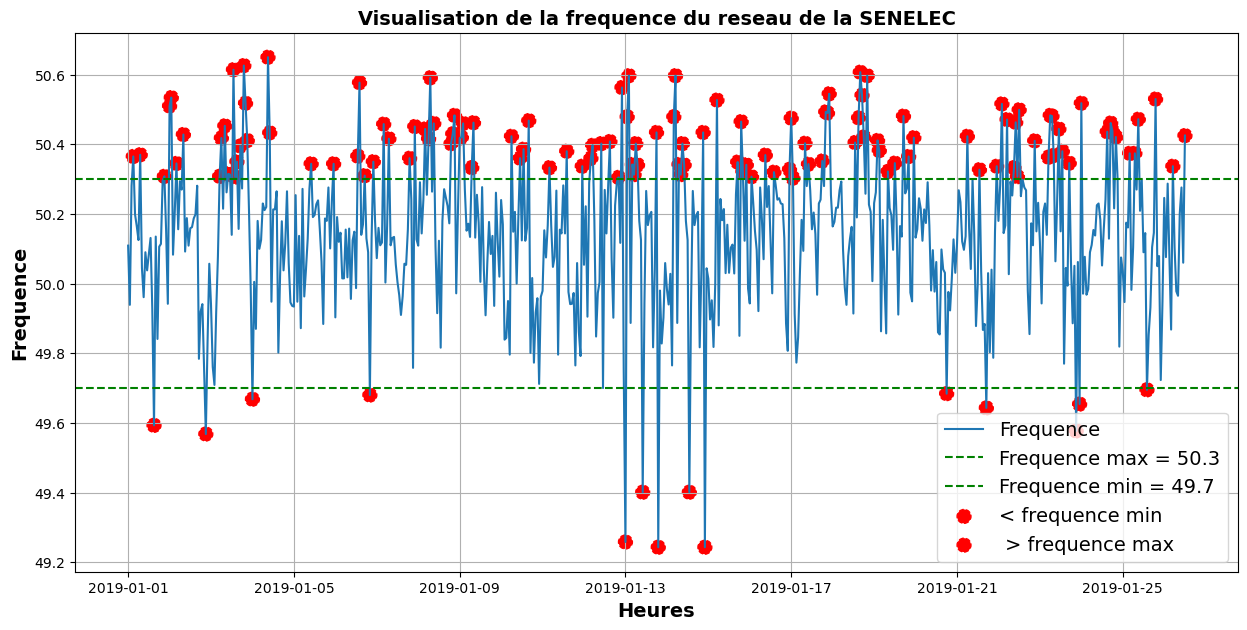

In [42]:
x = range(0,Demande_autr_forme.shape[0])

dates = pd.date_range(start="2019-01-01 00:00:00", periods=Demande_autr_forme.shape[0], freq="H")

y_max =50.3
y_min=49.7
len(x)
df = pd.DataFrame(
    {'frequence': Demande_autr_forme.Fréq ,
    'heurs':dates}
)
df_min = df.loc[df['frequence'] < y_min] 
df_max = df.loc[df['frequence'] > y_max] 

plt.figure(figsize=(15,7))
plt.plot(dates,Demande_autr_forme.Fréq,label= 'Frequence')
plt.axhline(y_max,color="green", linestyle="--", label=f"Frequence max = {y_max}")
plt.axhline(y_min,color="green", linestyle="--", label=f"Frequence min = {y_min}")

plt.scatter(df_min['heurs'], df_min['frequence'], color="red", label="< frequence min", s=100,linestyle="--")
plt.scatter(df_max['heurs'], df_max['frequence'], color="red", label=" > frequence max", s=100,linestyle="--")

plt.legend(fontsize=14)
plt.xlabel("Heures",fontsize=14, fontweight="bold")
plt.ylabel("Frequence",fontsize=14, fontweight="bold")
plt.title("Visualisation de la frequence du reseau de la SENELEC",fontsize=14, fontweight="bold")
plt.grid()
plt.show()

In [43]:
frequence_min = Demande_autr_forme.loc[Demande_autr_forme.Fréq < y_min]
frequence_min.head()

,DateHeure,Heure,Puis. Dispo,Puis TAG couplée,Demande,Fréq,ecare
15,2019-01-01 15:00:00,16,582.863823,0.0,370.933560,49.593000,211.930263
45,2019-01-01 18:00:00,19,560.627440,0.0,498.741511,49.568000,61.885929
72,2019-01-01 18:00:00,19,569.733200,0.0,503.725240,49.667999,66.007960
275,2019-01-01 05:00:00,6,516.550000,0.0,345.377115,49.680000,171.172885
477,2019-01-01 18:00:00,19,521.682308,0.0,466.182856,49.257999,55.499452


In [44]:
liste_colonnes = list(frequence_min.columns[2:])

In [45]:
frequence_min[liste_colonnes].describe()

,Puis. Dispo,Puis TAG couplée,Demande,Fréq,ecare
count,14.000000,14.0,14.000000,14.000000,14.000000
mean,595.159854,0.0,420.494801,49.522000,174.665053
std,55.642633,0.0,63.969581,0.175271,77.978364
min,516.550000,0.0,330.454022,49.243000,55.499452
25%,562.903880,0.0,371.454957,49.401001,117.564247
50%,583.567230,0.0,416.672109,49.585000,186.844601
75%,650.925000,0.0,485.927051,49.664499,225.888842
max,667.650000,0.0,503.725240,49.695000,309.295978


In [46]:
Délestage_2019['Frequence'] = frequence_couple
Délestage_2019.head()

1,Heure,P.dispo (MW),Demande (MW),Délest par Manque Product,P. Effacée (MW),Autres P. coupée (MW),Déficit total (MW),Frequence
0,1 h,636.930263,430.407707,0,0,0,0,50.109
1,2 h,636.930263,406.129563,0,0,0,0,49.939
2,3 h,636.930263,372.603857,0,0,0,0,50.281
3,4 h,636.930263,356.614,0,0,3.3,3.3,50.365
4,5 h,636.930263,352.424888,0,0,0,0,50.199


In [47]:
Délestage_2019.info()

<class 'pandas.core.frame.DataFrame'>
Index: 837 entries, 0 to 26
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Heure                          837 non-null    object 
 1   P.dispo (MW)                   837 non-null    object 
 2   Demande (MW)                   837 non-null    object 
 3   Délest par Manque Product      837 non-null    object 
 4   P. Effacée (MW)                837 non-null    object 
 5   Autres         P. coupée (MW)  837 non-null    object 
 6   Déficit total (MW)             837 non-null    object 
 7   Frequence                      837 non-null    float64
dtypes: float64(1), object(7)
memory usage: 58.9+ KB


In [48]:
Délestage_2019.isna().sum()

1
Heure                            0
P.dispo (MW)                     0
Demande (MW)                     0
Délest par Manque Product        0
P. Effacée (MW)                  0
Autres         P. coupée (MW)    0
Déficit total (MW)               0
Frequence                        0
dtype: int64

In [49]:
fequence_delestage = Délestage_2019.drop("Heure",axis=1)
fequence_delestage.head()#describe()

1,P.dispo (MW),Demande (MW),Délest par Manque Product,P. Effacée (MW),Autres P. coupée (MW),Déficit total (MW),Frequence
0,636.930263,430.407707,0,0,0,0,50.109
1,636.930263,406.129563,0,0,0,0,49.939
2,636.930263,372.603857,0,0,0,0,50.281
3,636.930263,356.614,0,0,3.3,3.3,50.365
4,636.930263,352.424888,0,0,0,0,50.199


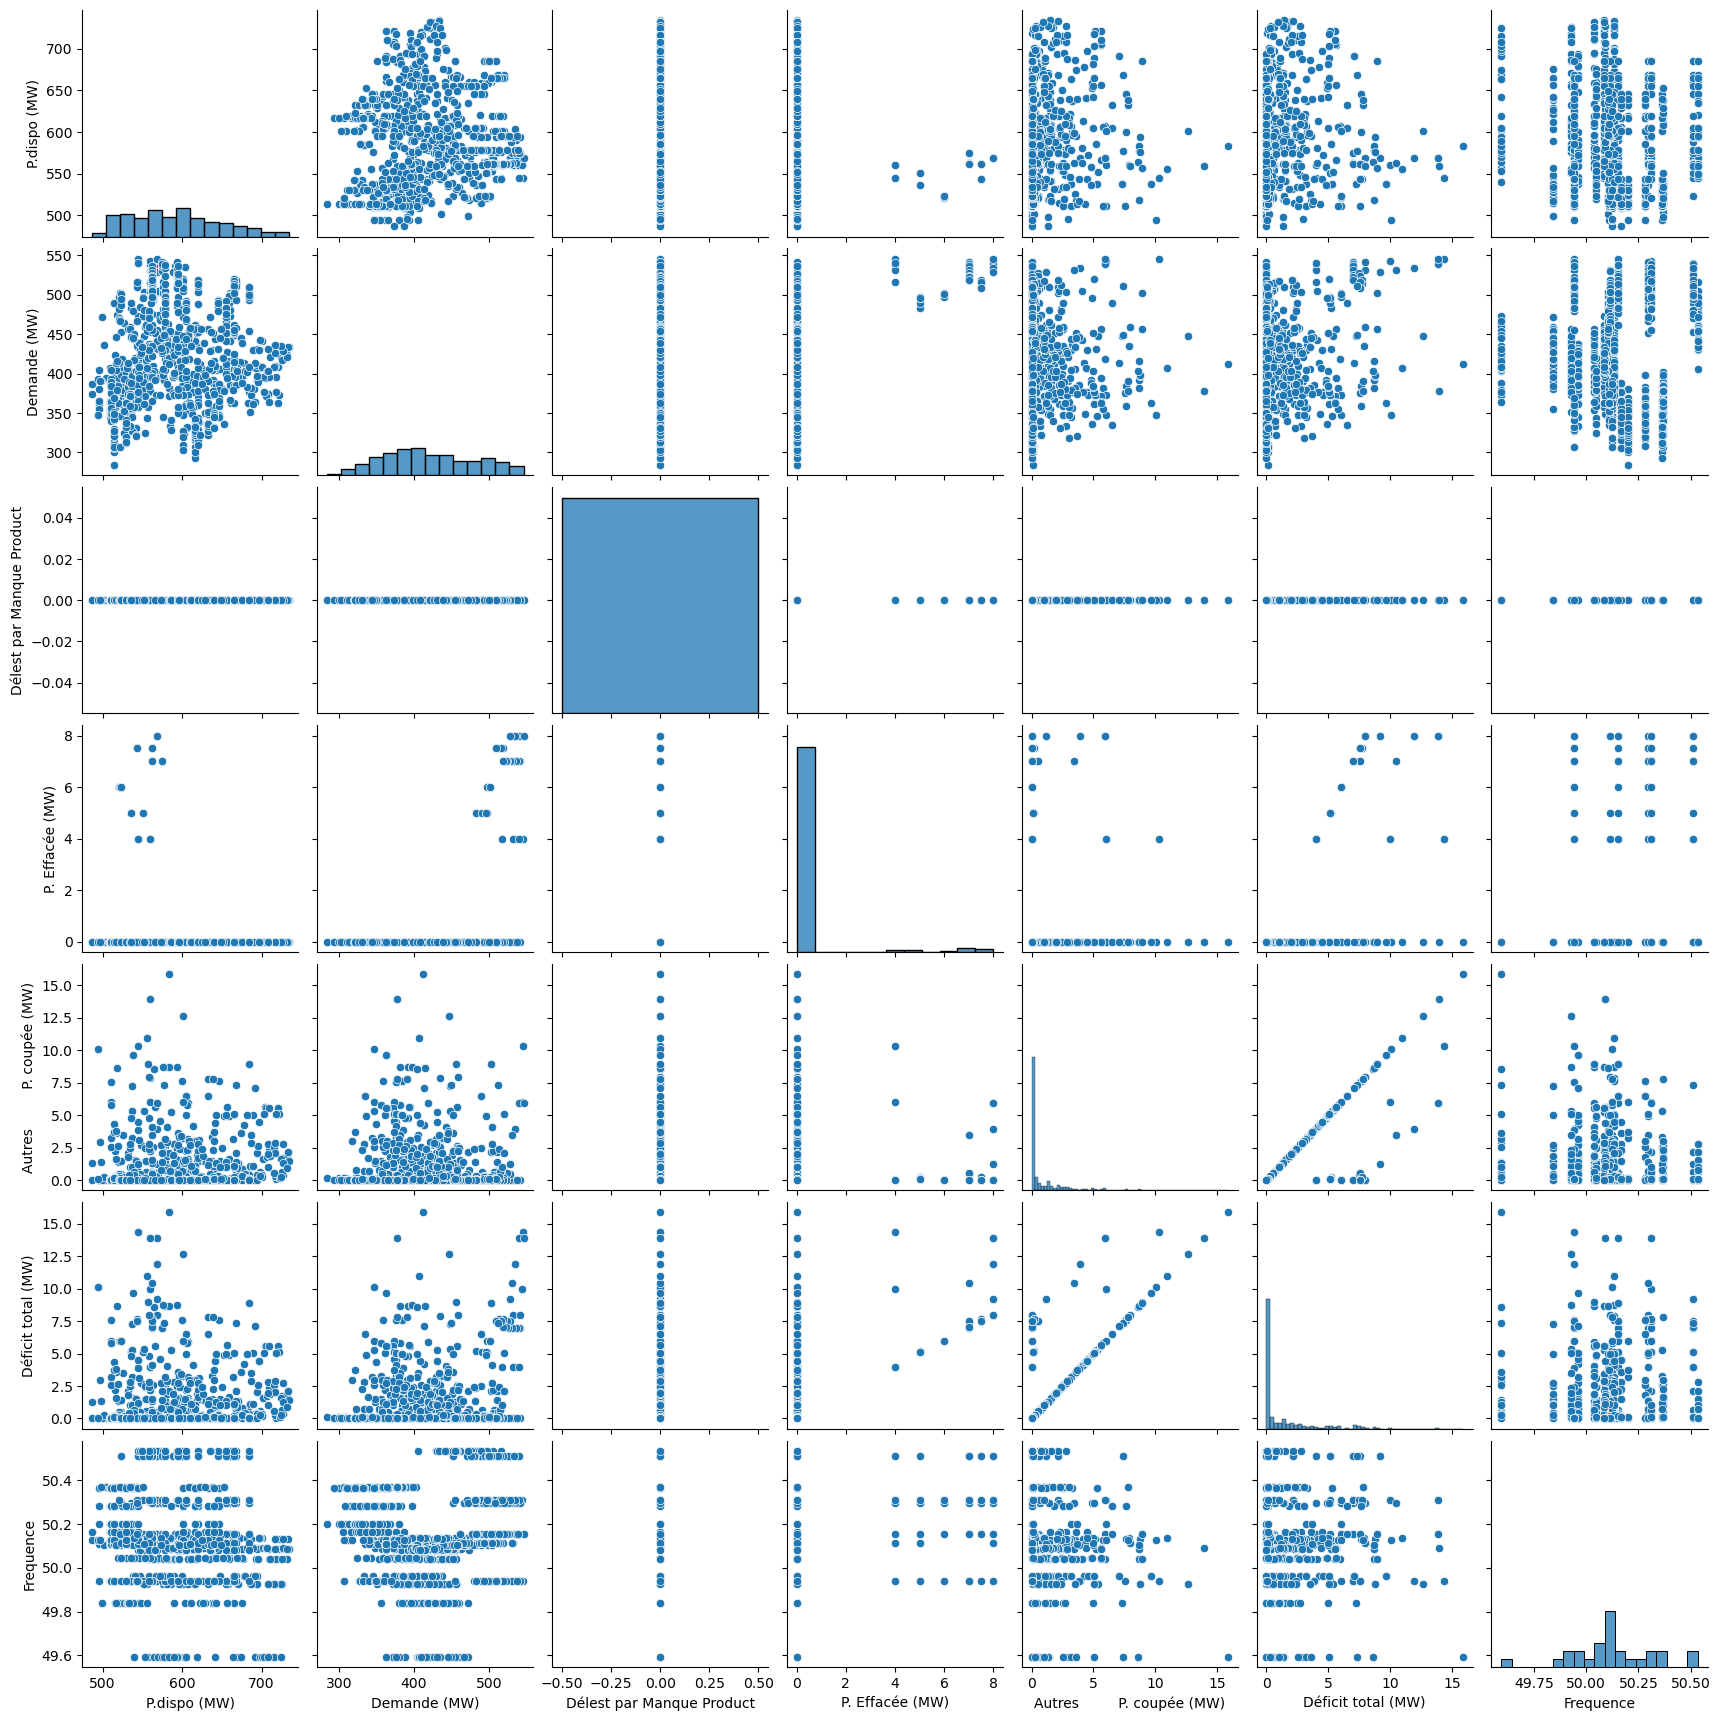

In [50]:
sns.pairplot(fequence_delestage, hue=None,kind='scatter',diag_kind='auto',markers=None)

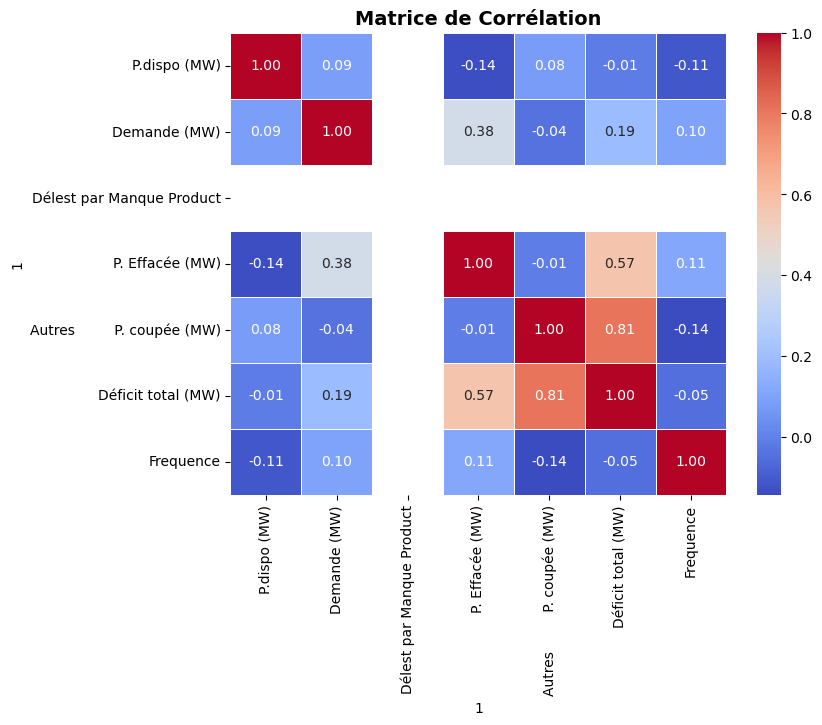

In [51]:
# Calcul de la matrice de corrélation
corr_Délestage_2019 = fequence_delestage .corr()

# Création du heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_Délestage_2019, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Ajout d'un titre
plt.title("Matrice de Corrélation", fontsize=14, fontweight="bold")

# Affichage
plt.show()

In [52]:
fequence_delestage.describe()

1,Frequence
count,837.000000
mean,50.127481
std,0.196881
min,49.593000
25%,50.038000
50%,50.114000
75%,50.281000
max,50.534000


In [53]:
fequence_delestage.columns

Index(['P.dispo (MW)', 'Demande (MW)', 'Délest par Manque Product',
       'P. Effacée (MW)', 'Autres         P. coupée (MW)',
       'Déficit total (MW)', 'Frequence'],
      dtype='object', name=1)

In [54]:
dates = pd.date_range(start="2019-01-01 00:00:00", periods=fequence_delestage.shape[0], freq="H")

C:\Users\Abdoulaye_Faye\AppData\Local\Temp\ipykernel_5356\2380416194.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(start="2019-01-01 00:00:00", periods=fequence_delestage.shape[0], freq="H")


<Axes: xlabel='Déficit total (MW)', ylabel='Frequence'>

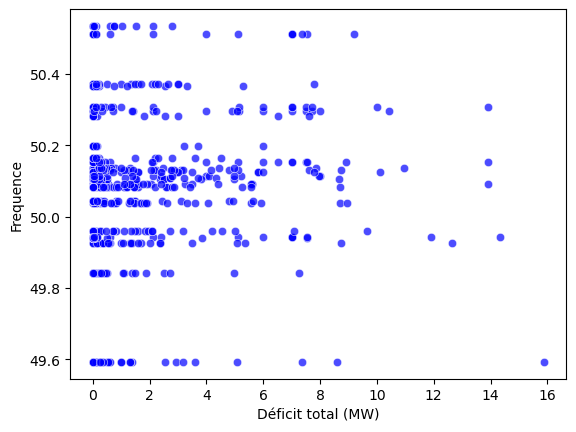

In [55]:
deffe = fequence_delestage[fequence_delestage.columns[2:]].drop('Frequence',axis=1)
plt.Figure(figsize=(15,7))
sns.scatterplot(x='Déficit total (MW)', y='Frequence', data=fequence_delestage, alpha=0.7, color="blue")

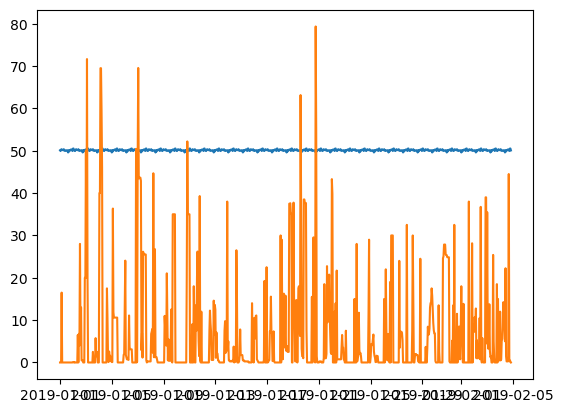

In [56]:
plt.Figure(figsize=(15,7))
plt.plot(dates,fequence_delestage.Frequence);
plt.plot(dates,fequence_delestage['Déficit total (MW)']*5)

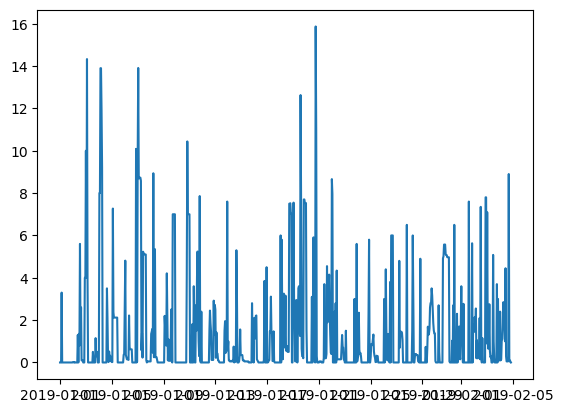

In [57]:
plt.plot(dates,fequence_delestage['Déficit total (MW)'])